In [77]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import pandas_datareader as pdr
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from itertools import product
from tqdm import tqdm_notebook


In [79]:
btc_data = pdr.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2020, 1, 1), end= datetime.datetime(2022, 5, 30))
btc_data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...,...
2022-05-27,28627.574219,28627.574219,29346.943359,28326.613281,29251.140625,36582005748
2022-05-28,28814.900391,28814.900391,28814.900391,28554.566406,28622.625000,35519577634


In [80]:
adj_cols = [btc_data.columns[x][0] for x in range(len(btc_data.columns))]
adj_cols

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [81]:
btc_data.columns =  adj_cols
btc_data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-05-27,28627.574219,28627.574219,29346.943359,28326.613281,29251.140625,36582005748
2022-05-28,28814.900391,28814.900391,28814.900391,28554.566406,28622.625000,35519577634
2022-05-29,29445.957031,29445.957031,29498.009766,28841.107422,29019.867188,18093886409
2022-05-30,31726.390625,31726.390625,31949.630859,29303.572266,29443.365234,39277993274
2022-05-31,31792.310547,31792.310547,32249.863281,31286.154297,31723.865234,33538210634


In [82]:
btc_data.Close.shift().fillna(0)

Date
2020-01-01        0.000000
2020-01-02     7200.174316
2020-01-03     6985.470215
2020-01-04     7344.884277
2020-01-05     7410.656738
                  ...     
2022-05-27    29267.224609
2022-05-28    28627.574219
2022-05-29    28814.900391
2022-05-30    29445.957031
2022-05-31    31726.390625
Name: Close, Length: 882, dtype: float64

In [83]:
btc_data['diff_from_previous_day'] = btc_data['Close'] - btc_data['Close'].shift().fillna(0)

Max or cap 7293.0234375 Min or floor -7554.0390625


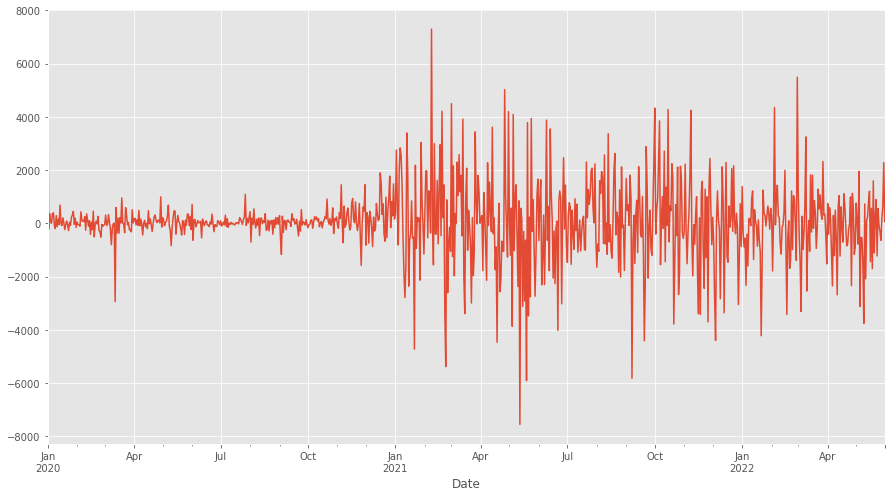

In [84]:
btc_data.diff_from_previous_day.plot(figsize=(15, 8))
print("Max or cap", btc_data.diff_from_previous_day.max(), "Min or floor", btc_data.diff_from_previous_day.min())

In [85]:
# Preparing a seperate dataframe with adjusted column names and our target variables as needed by the fbprophet module to work
ts = pd.DataFrame({'ds': btc_data.index, 'y': btc_data.Close})
# ts['cap'] = 7924
# ts['floor'] = -7555
ts.head()

,ds,y
Date,,
2020-01-01,2020-01-01,7200.174316
2020-01-02,2020-01-02,6985.470215
2020-01-03,2020-01-03,7344.884277
2020-01-04,2020-01-04,7410.656738
2020-01-05,2020-01-05,7411.317383


In [86]:
from fbprophet import Prophet

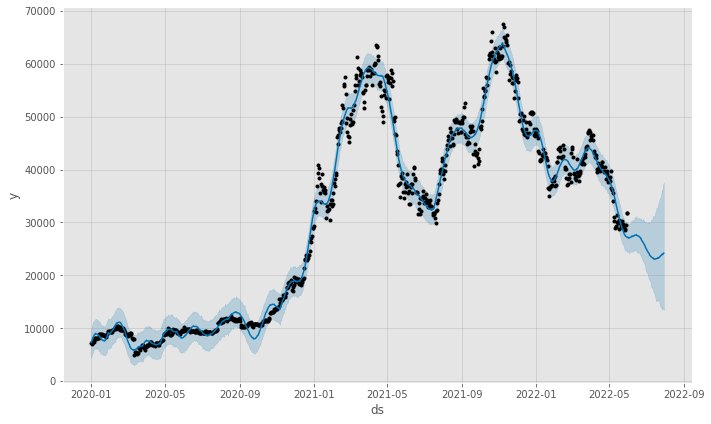

In [87]:

m = Prophet(daily_seasonality=True, changepoint_prior_scale=0.75)
m.fit(ts)

future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

fig = m.plot(forecast)

In [88]:
# prophet took the historical data prepared the equation and then predicted values for all the date index, i.e. prediction from the first date of the dataframe till the end and also the future periods given as forecast argument
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
912,2022-07-01,25043.656419,20654.222577,30066.871716
913,2022-07-02,24850.449986,20563.588352,30005.425279
914,2022-07-03,24629.291265,20358.155439,29746.153076
915,2022-07-04,24446.350503,19977.804950,30072.883960
916,2022-07-05,24232.138039,19356.573476,29757.937713
917,2022-07-06,24124.020329,19238.340472,30155.619220
918,2022-07-07,23787.089132,18951.148100,29768.414211
919,2022-07-08,23642.488543,18832.523196,29963.460411
920,2022-07-09,23534.716470,18150.615215,30458.903436
921,2022-07-10,23411.478629,17572.306047,30540.143461


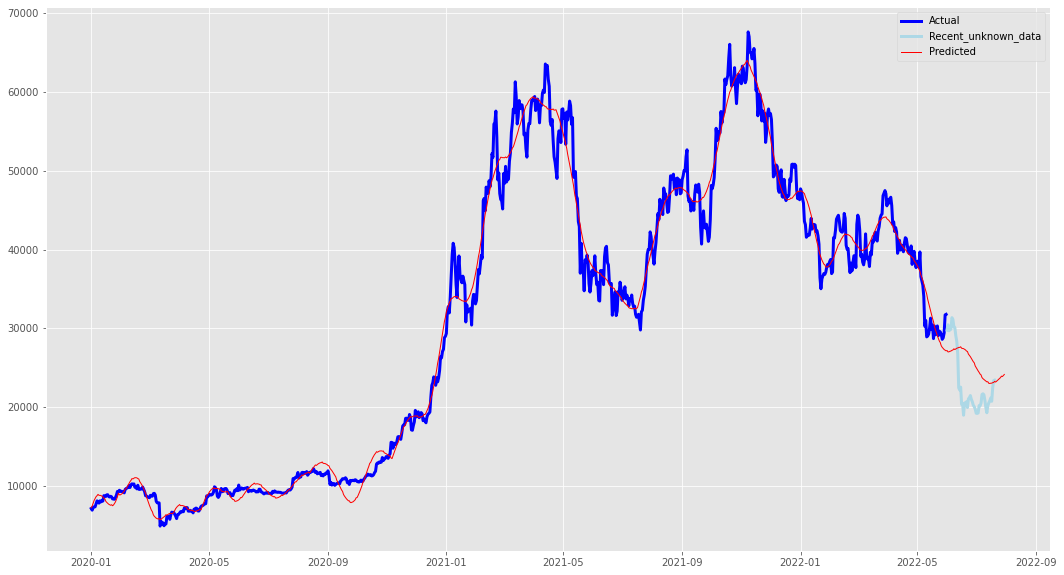

In [89]:
btc_recent = pdr.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2022, 6, 1))

plt.figure(figsize=(18, 10))
plt.plot(btc_data['Close'], linewidth=3, color='blue', label='Actual')
plt.plot(btc_recent['Close'], linewidth=3, color='lightblue', label="Recent_unknown_data")
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted', linewidth=1)
plt.legend(loc='best')
plt.show()

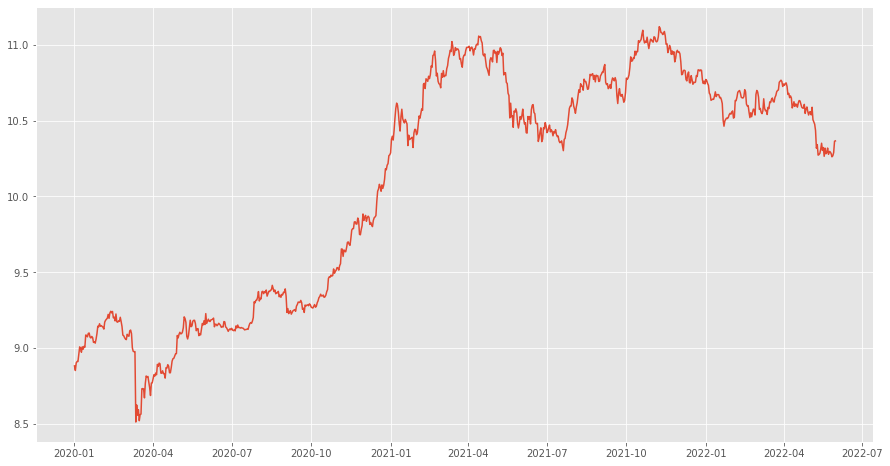

In [90]:
## Modelling with taking log of the variable
plt.figure(figsize = (15, 8))
plt.plot(np.log(btc_data['Close']))

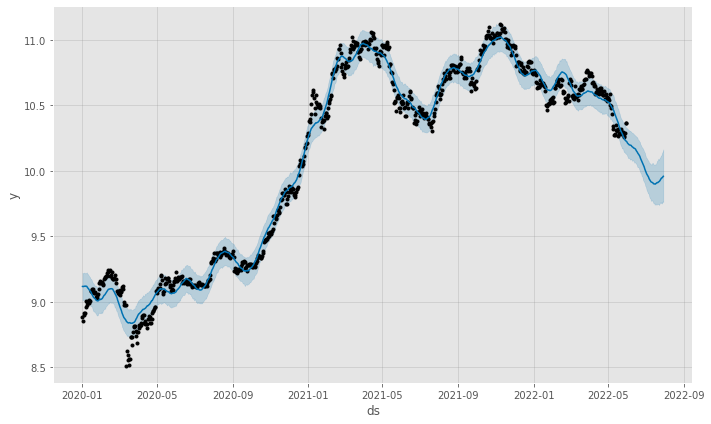

In [91]:
ts_logged = pd.DataFrame({'ds':btc_data.index, 'y':np.log(btc_data.Close)})

m = Prophet(daily_seasonality=True, changepoint_prior_scale=0.015)
m.fit(ts_logged)

future_logged = m.make_future_dataframe(periods=60)
forecast_logged = m.predict(future_logged)

fig = m.plot(forecast_logged)

In [92]:
# checking checkpoints prophet used
from fbprophet.plot import add_changepoints_to_plot

a = add_changepoints_to_plot(fig.gca(), m, forecast_logged)

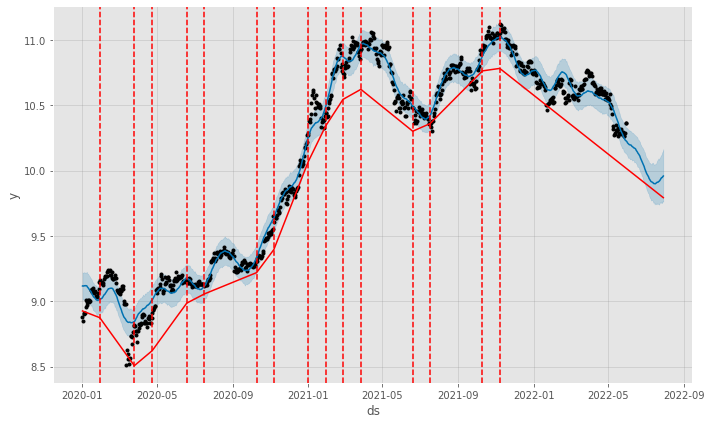

In [93]:
fig

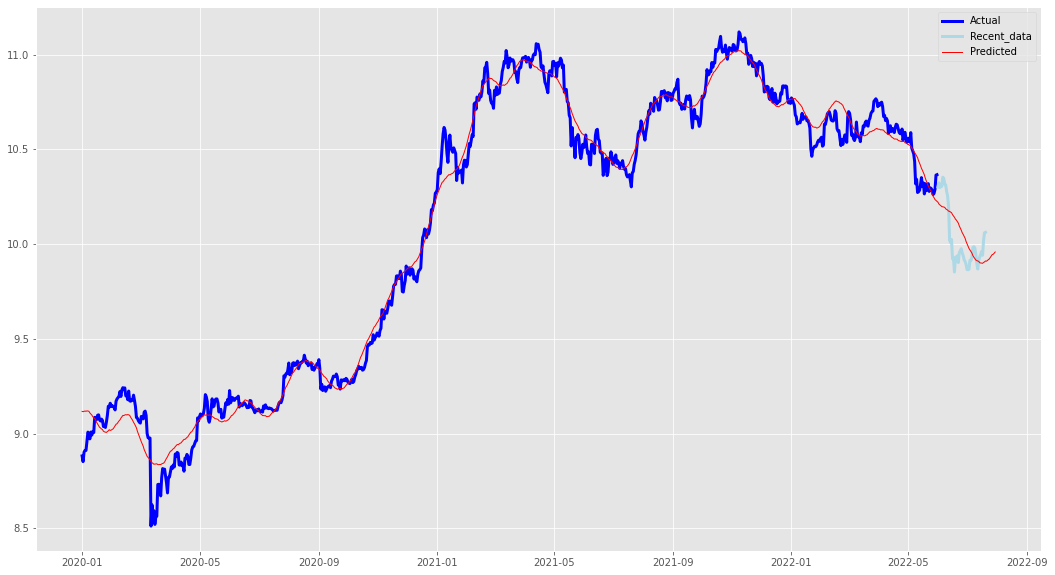

In [94]:
# Plot against original and unknown recent data
plt.figure(figsize=(18, 10))
plt.plot(np.log(btc_data['Close']), linewidth=3, color='blue', label='Actual')
plt.plot(np.log(btc_recent['Close']), linewidth=3, color='lightblue', label="Recent_data")
plt.plot(forecast_logged['ds'], forecast_logged['yhat'], color='red', label='Predicted', linewidth=1)
plt.legend(loc='best')
plt.show()

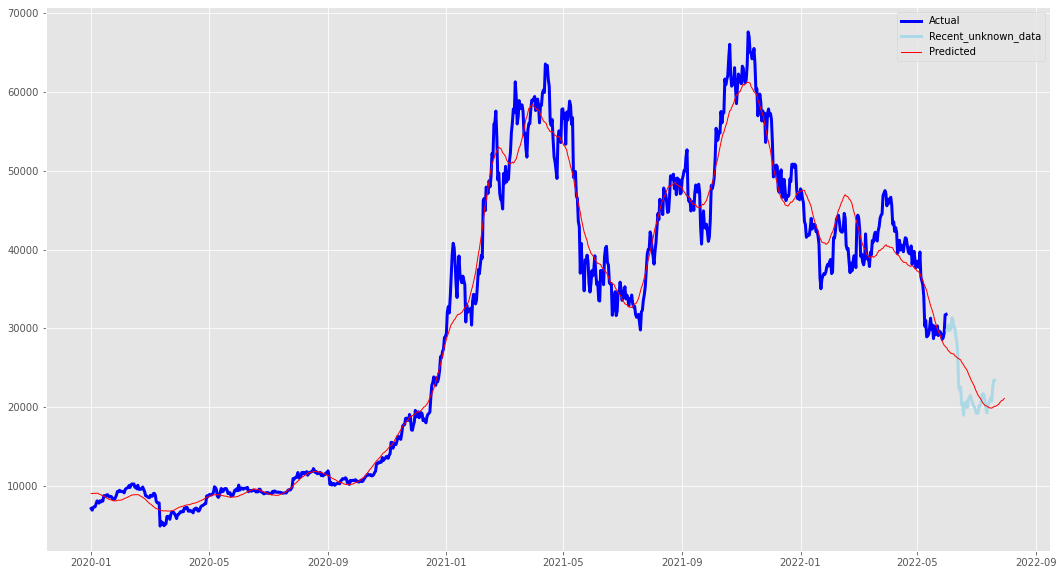

In [95]:
# the above plot is in log scale. Lets convert it into original
forecast_logged['Close_normal'] = np.exp(forecast_logged['yhat'])

plt.figure(figsize=(18, 10))
plt.plot(btc_data['Close'], linewidth=3, color='blue', label='Actual')
plt.plot(btc_recent['Close'], linewidth=3, color='lightblue', label="Recent_unknown_data")
plt.plot(forecast_logged['ds'], forecast_logged['Close_normal'], color='red', label='Predicted', linewidth=1)
plt.legend(loc='best')
plt.show()

In [96]:
forecast_logged[['ds', 'Close_normal']].tail(30)

,ds,Close_normal
912,2022-07-01,22069.006628
913,2022-07-02,21818.667780
914,2022-07-03,21537.249081
915,2022-07-04,21369.622833
916,2022-07-05,21180.749784
917,2022-07-06,21016.061148
918,2022-07-07,20735.392222
919,2022-07-08,20563.139692
920,2022-07-09,20420.460406
921,2022-07-10,20257.761967
